In [5]:
#Dependencies

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [6]:
#Import dataset

dataset = pd.read_csv('./Resources/food_loss_2013.csv')

In [7]:
#Confirming number of rows and columns

dataset.shape

(980, 7)

In [8]:
#Checking the statistical details

dataset.describe()

,geographicaream49,measureditemcpc,timepointyears,loss_per_clean
count,980.000000,980.000000,980.0,980.000000
mean,485.406122,1459.362020,2013.0,6.901103
std,258.509305,3679.524472,0.0,9.802746
min,4.000000,111.000000,2013.0,0.000000
25%,276.000000,112.000000,2013.0,1.466325
50%,524.000000,1212.000000,2013.0,3.449150
75%,724.000000,1376.975000,2013.0,8.487250
max,862.000000,21512.000000,2013.0,96.749200


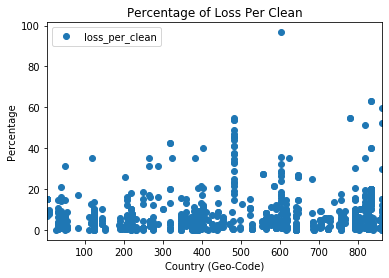

In [9]:
# Plot data points to see if there is any distinct relationship

dataset.plot(x='geographicaream49', y='loss_per_clean', style='o')  
plt.title('Percentage of Loss Per Clean')  
plt.xlabel('Country (Geo-Code)')  
plt.ylabel('Percentage')
plt.savefig("img/lpc13.png") 
plt.show()

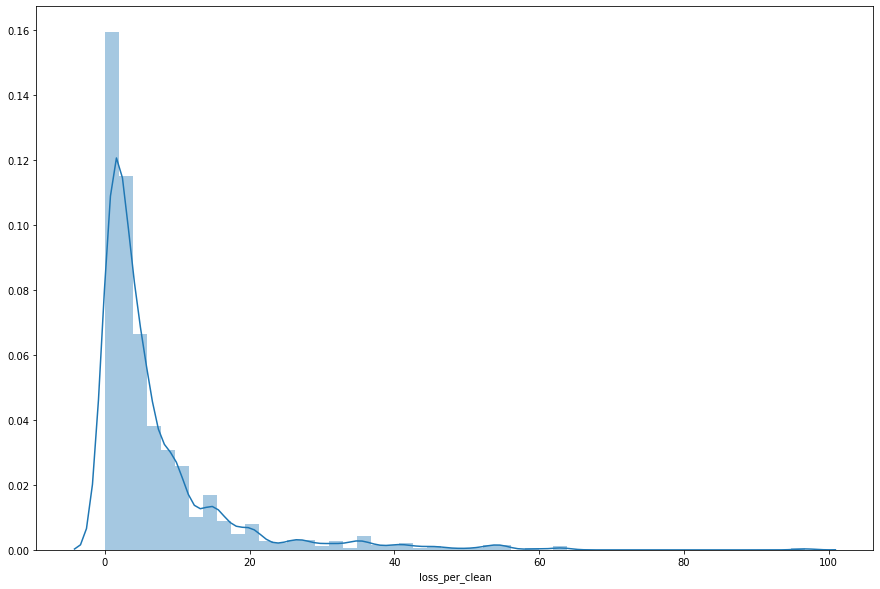

In [10]:
# Plot to determine where the average loss per clean lies (it appears to be between 0 and 20 percent)

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['loss_per_clean'])
plt.savefig("img/lpc13barline.png") 

In [11]:
# Seperate into attributes and labels

X = dataset['geographicaream49'].values.reshape(-1,1)
y = dataset['loss_per_clean'].values.reshape(-1,1)

In [12]:
# View dataset headers

dataset.head()

,geographicaream49,country,measureditemcpc,crop,timepointyears,loss_per_clean,fsc_location1
0,112,Belarus,1212.0,cabbages,2013,6.4605,Total Supply Chain Estimate
1,112,Belarus,2211.0,raw milk of cattle,2013,0.0076,Total Supply Chain Estimate
2,116,Cambodia,1234.0,Tomatoes,2013,3.5000,Wholesale
3,116,Cambodia,1234.0,Tomatoes,2013,3.5000,Retail
4,116,Cambodia,1234.0,Tomatoes,2013,3.5000,Traders


In [13]:
# cols_to_transform = ['crop']
# dataset_with_dummies = pd.get_dummies( columns = cols_to_transform )

In [14]:
# Set the training set to test the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Fit the training set

regressor = LinearRegression()  
    
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#To retrieve the intercept:

print(regressor.intercept_)

#For retrieving the slope:

print(regressor.coef_)

[5.42337267]
[[0.00280235]]


In [17]:
# Start making your predictions

y_pred = regressor.predict(X_test)

In [18]:
# Compare actual values vs pedicted values

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,53.7600,6.779710
1,2.5000,6.684430
2,4.7722,6.538708
3,3.5722,7.149621
4,5.0532,7.079562
5,0.5536,7.738114
6,5.7716,7.738114
7,3.9000,7.345785
8,3.2175,7.642834
9,1.6000,7.401832


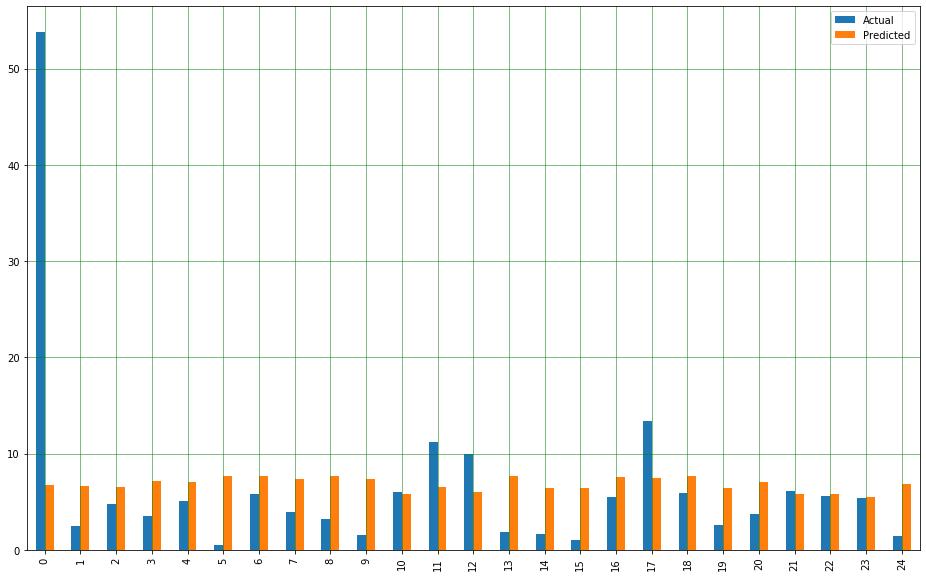

In [19]:
# Set the comparison in a bar graph (used the 25 records)

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("img/lpcbar13.png")
plt.show() 

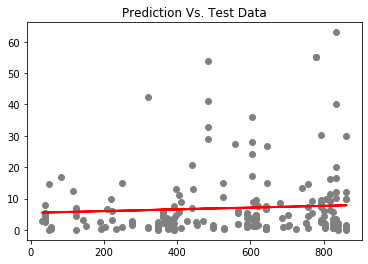

In [20]:
# Visualize in a scatter plot

plt.title('Prediction Vs. Test Data')
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.savefig("img/scat13.png") 
plt.show()

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.429316496783488
Mean Squared Error: 112.84699739625054
Root Mean Squared Error: 10.622946737899543
